In [ ]:
import pandas as pd
!pip install scikeras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [ ]:
csv_data = pd.read_csv('/content/drive/My Drive/Intro to AI/Assignment 3/CustomerChurn_dataset.csv')

In [ ]:
data = pd.DataFrame(csv_data)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Create a summary of dataset attributes
items = [
    [
        col,
        data[col].dtype,
        data[col].nunique(),
        list(data[col].unique()[:3]),
        data[col].isnull().sum()
    ] for col in data
]

# Display the summary in a DataFrame
display(pd.DataFrame(data=items, columns=[
    'Attributes',
    'Data Type',
    'Total Unique',
    'Unique Sample',
    'Total Missing'
]))

# Display memory usage and data info
data.info(verbose=False, memory_usage=True)

#https://www.kaggle.com/code/reyhanarighy/predictive-ml-for-telco-customer-churn?scriptVersionId=144901561&cellId=6

,Attributes,Data Type,Total Unique,Unique Sample,Total Missing
0,customerID,object,7043,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK]",0
1,gender,object,2,"[Female, Male]",0
2,SeniorCitizen,int64,2,"[0, 1]",0
3,Partner,object,2,"[Yes, No]",0
4,Dependents,object,2,"[No, Yes]",0
5,tenure,int64,73,"[1, 34, 2]",0
6,PhoneService,object,2,"[No, Yes]",0
7,MultipleLines,object,3,"[No phone service, No, Yes]",0
8,InternetService,object,3,"[DSL, Fiber optic, No]",0
9,OnlineSecurity,object,3,"[No, Yes, No internet service]",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Columns: 21 entries, customerID to Churn
dtypes: float64(1), int64(2), object(18)
memory usage: 1.1+ MB


In [ ]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[np.isnan(data['TotalCharges'])==True]

#All rows with total charges of zero have a tenure of zero, indicating they are new customers.
#They will be dropped since they won't contribute to churn prediction for existing customers.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data = data.drop(labels=data[data['tenure'] == 0].index, axis=0)

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Exploratory Data Analysis


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Based on the mean, aroud 16% of the customers are Senior Citizens. The average time with the company is 32.4 months, with the minimum
#as 1 month and the maximum as 72 months. The mean monthly charge is 64.8 ranging from 18.25 to 118.75. The average total charge is 2283
# ranging from 18.80 to 8684.80

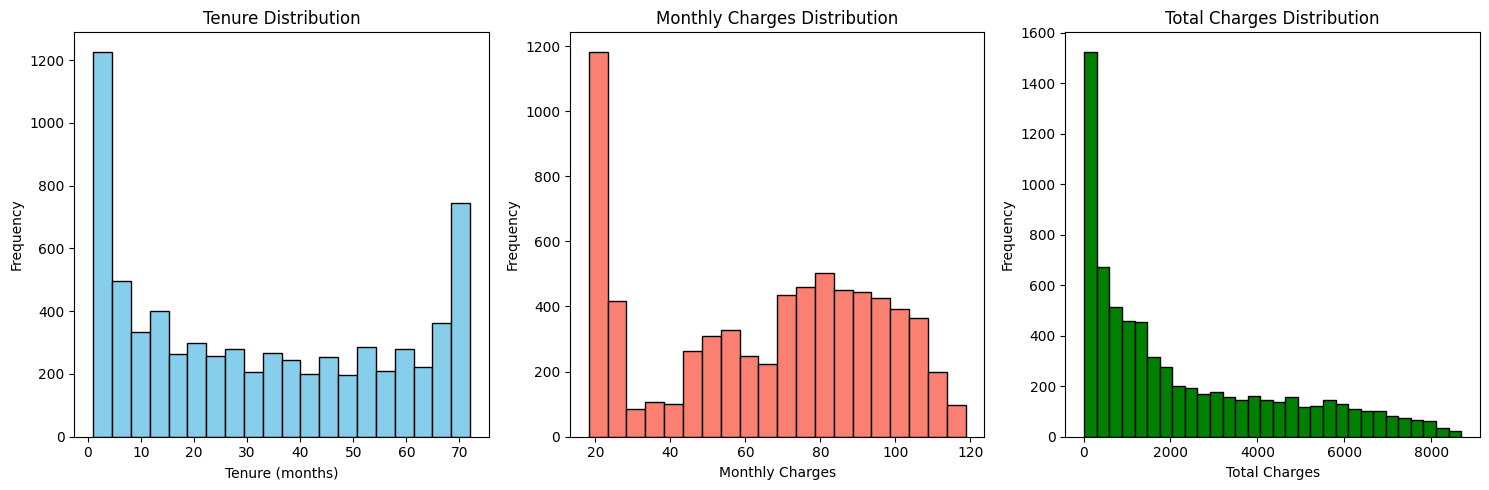

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting distribution for tenure
axs[0].hist(data['tenure'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Tenure Distribution')
axs[0].set_xlabel('Tenure (months)')
axs[0].set_ylabel('Frequency')

# Plotting distribution for monthly charges
axs[1].hist(data['MonthlyCharges'], bins=20, color='salmon', edgecolor='black')
axs[1].set_title('Monthly Charges Distribution')
axs[1].set_xlabel('Monthly Charges')
axs[1].set_ylabel('Frequency')

# Plotting distribution for total charges
axs[2].hist(data['TotalCharges'], bins=30, color='green', edgecolor='black')
axs[2].set_title('Total Charges Distribution')
axs[2].set_xlabel('Total Charges')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

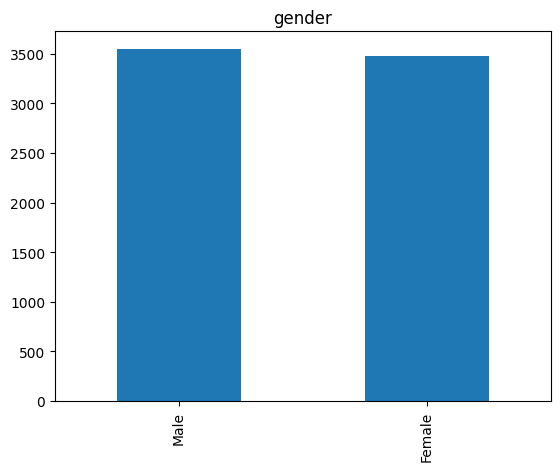

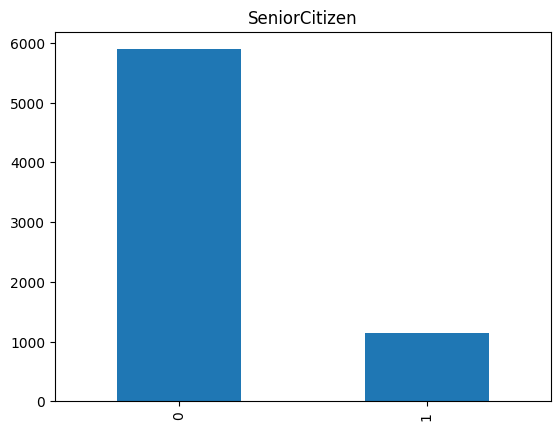

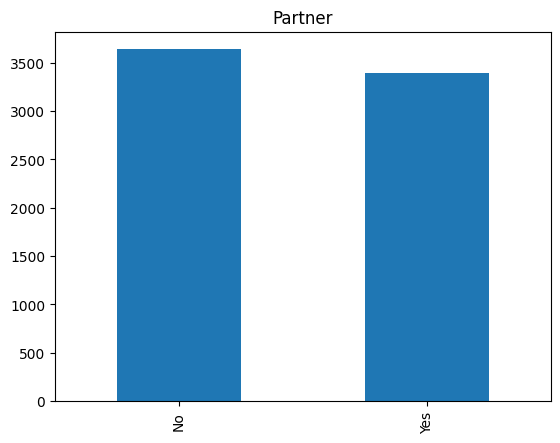

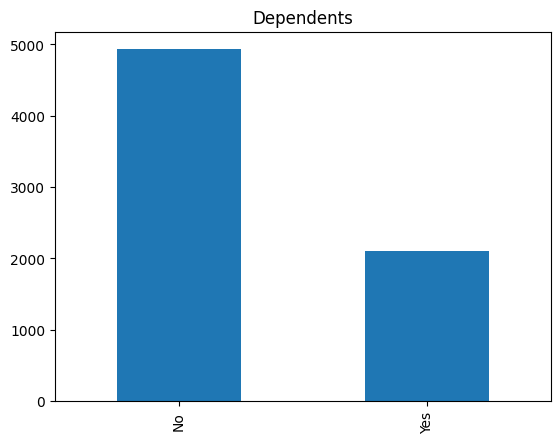

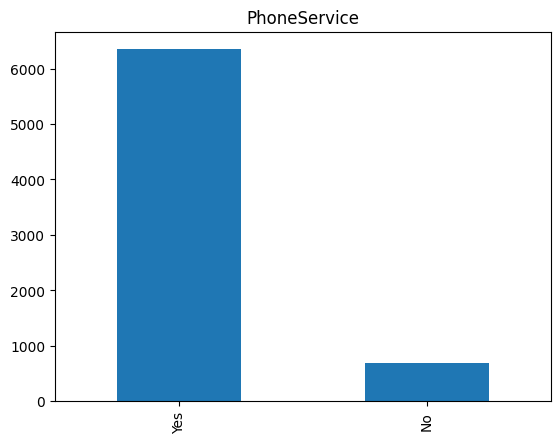

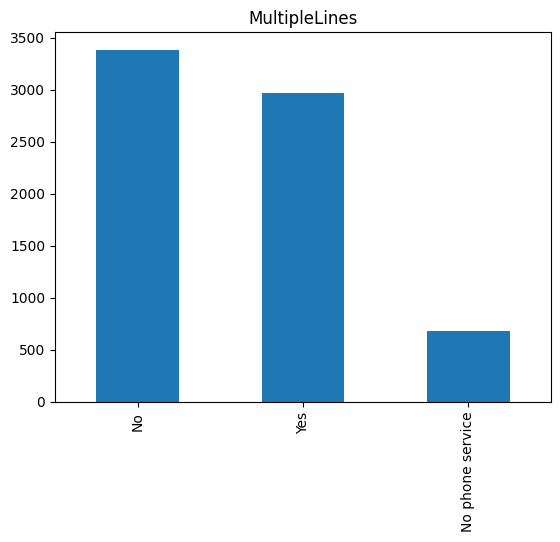

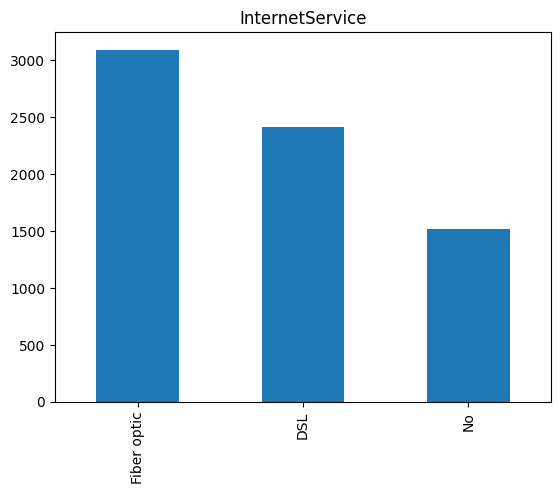

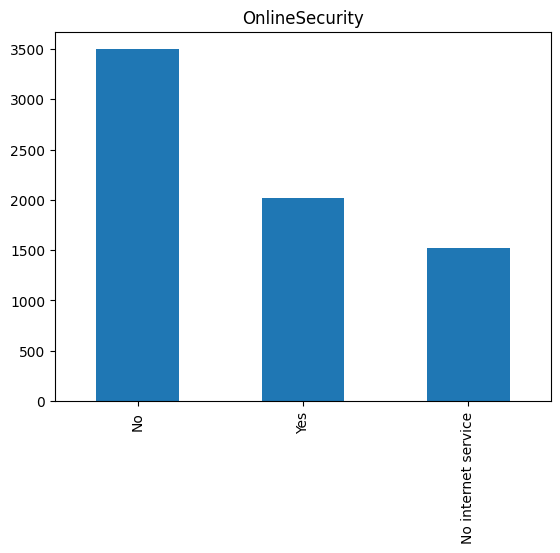

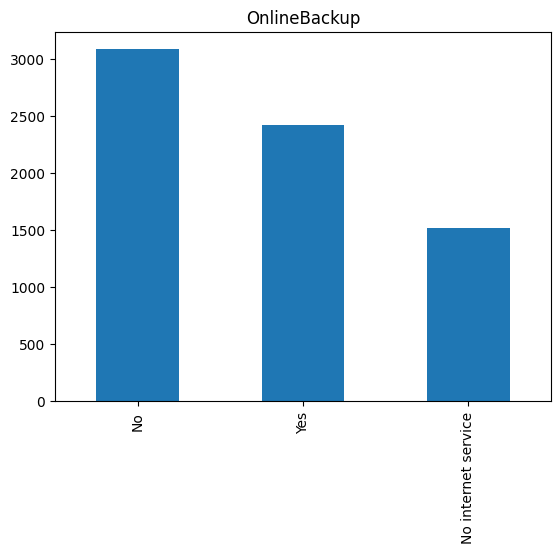

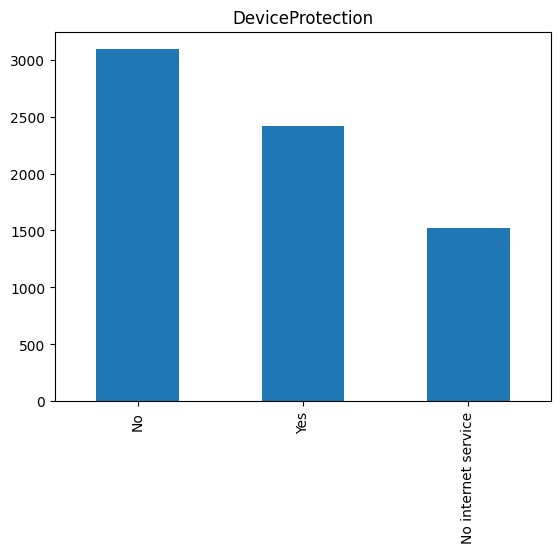

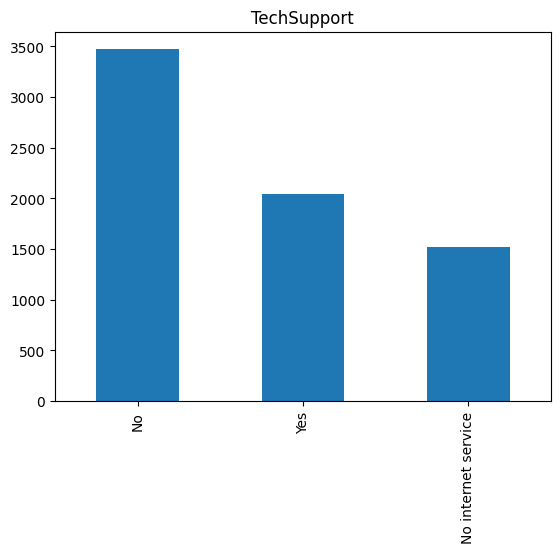

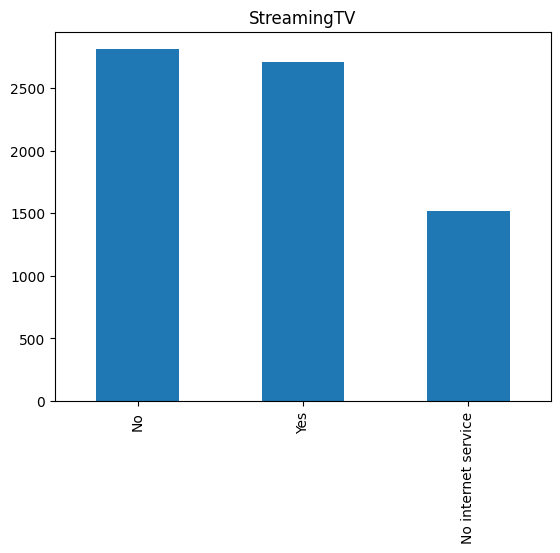

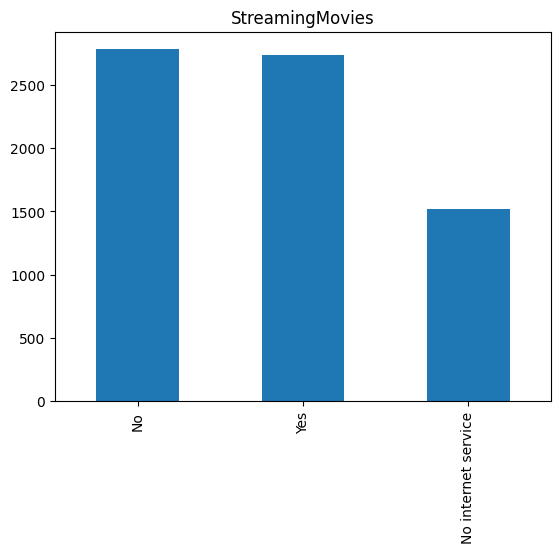

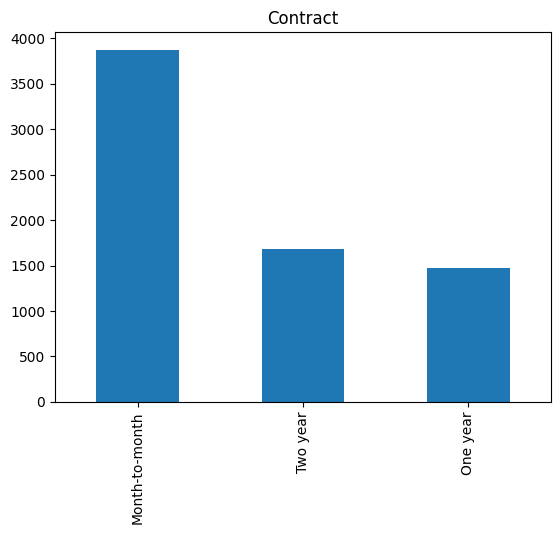

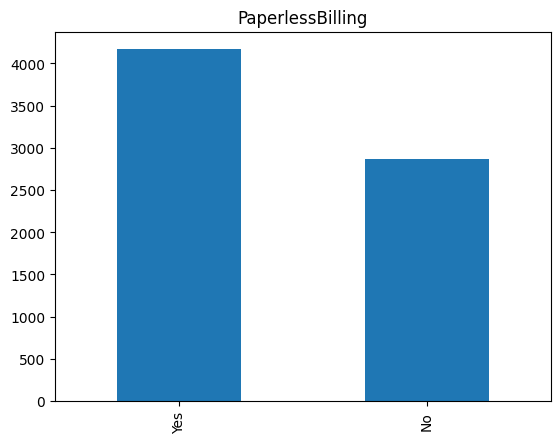

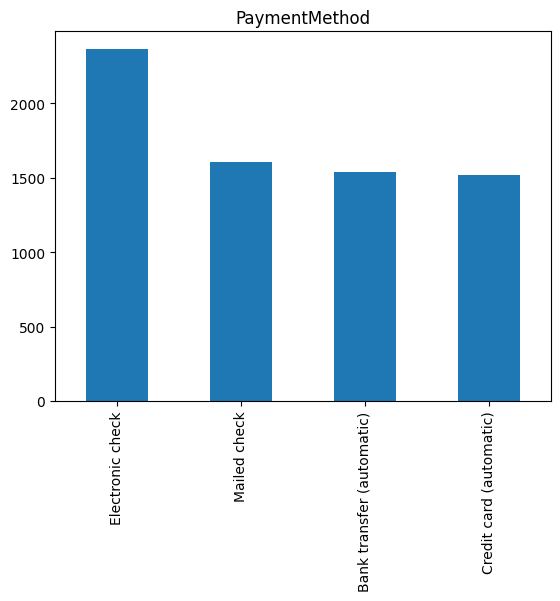

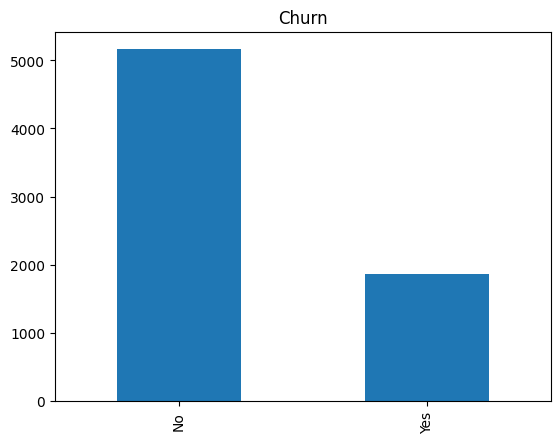

<Figure size 640x480 with 0 Axes>

In [ ]:


# List of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Plotting
for feature in categorical_features:
    data[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.show()

plt.tight_layout()
plt.show()

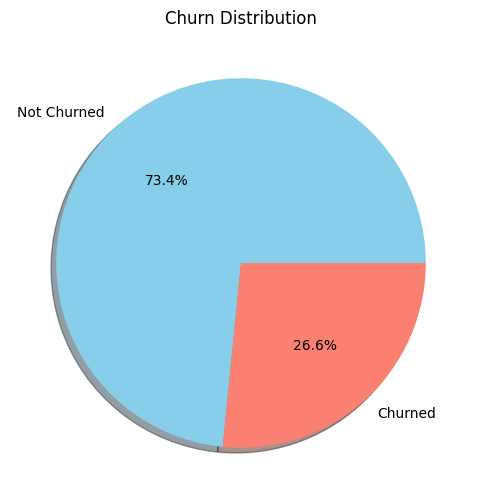

In [ ]:

# Creating a pie chart for churn distribution
plt.figure(figsize=(6, 6))
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], colors=['skyblue', 'salmon'], autopct='%1.1f%%', shadow=True)
plt.title('Churn Distribution')
plt.show()


<ipython-input-19-a8c8e20dfbd6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


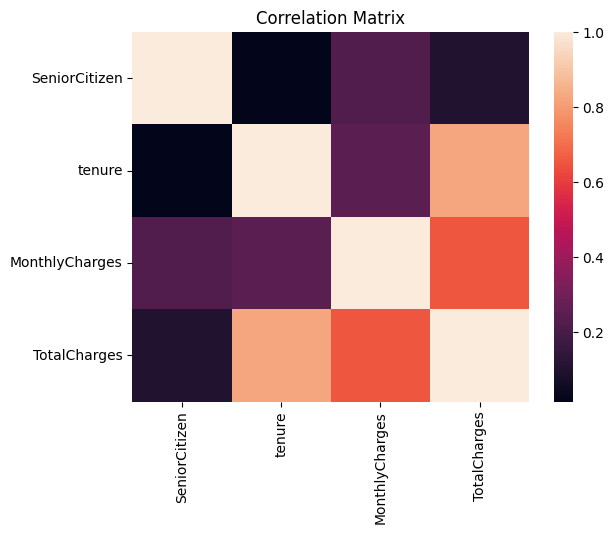

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.title('Correlation Matrix')
plt.show()

Tenure and Total Charges have high correlation

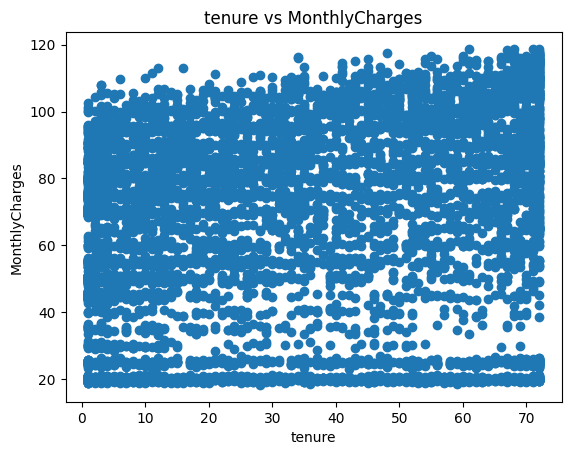

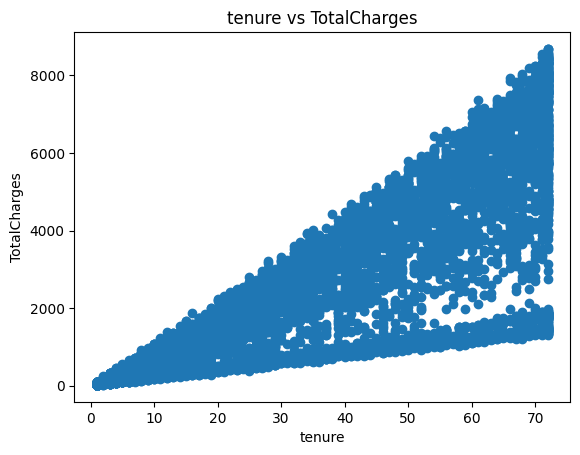

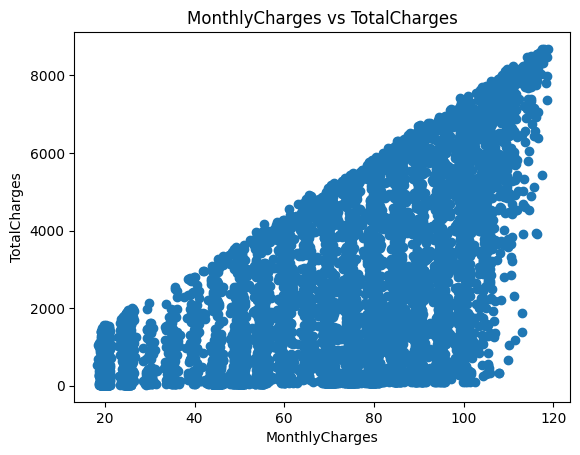

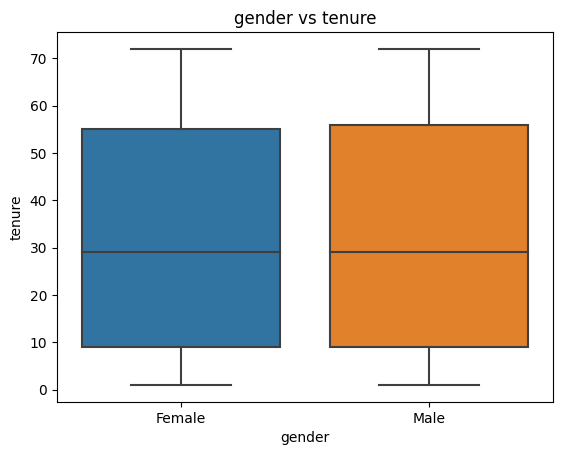

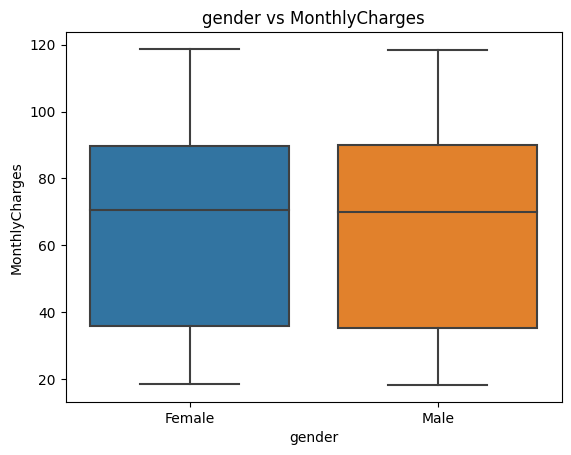

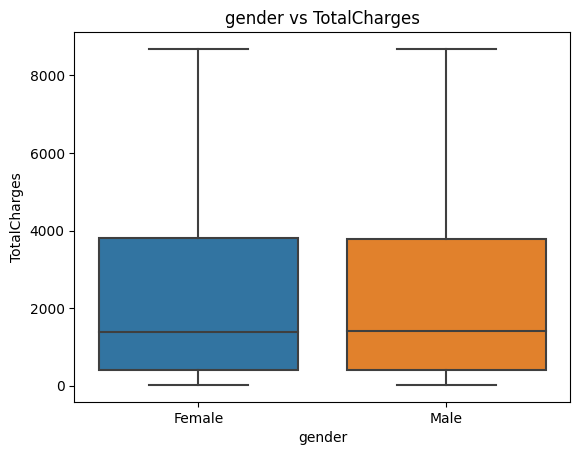

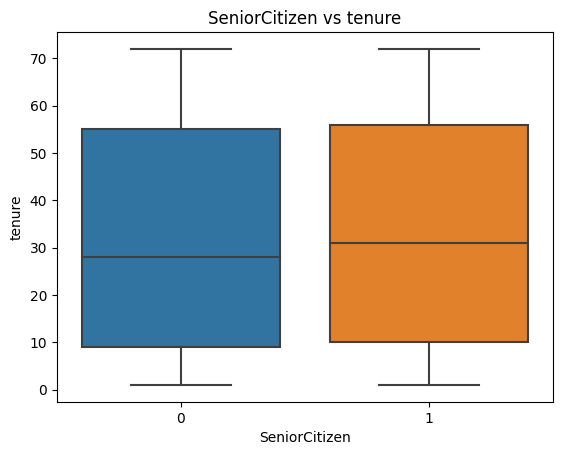

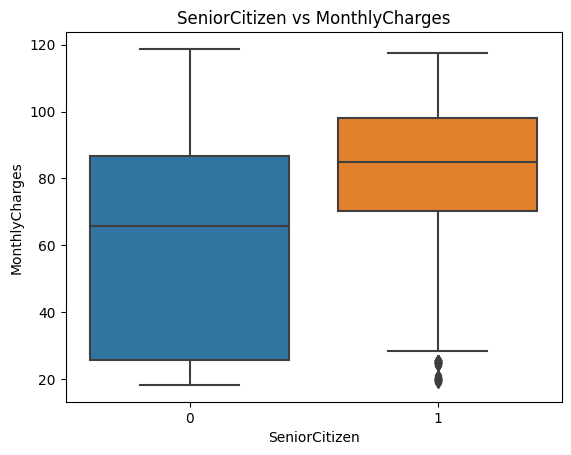

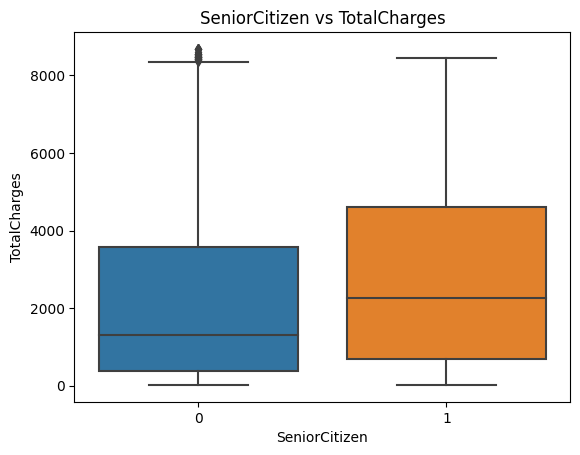

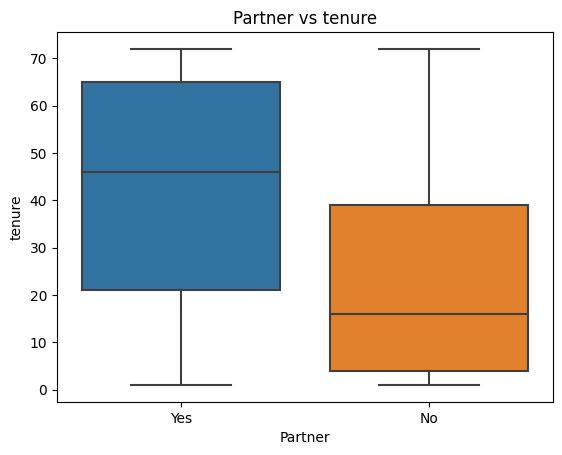

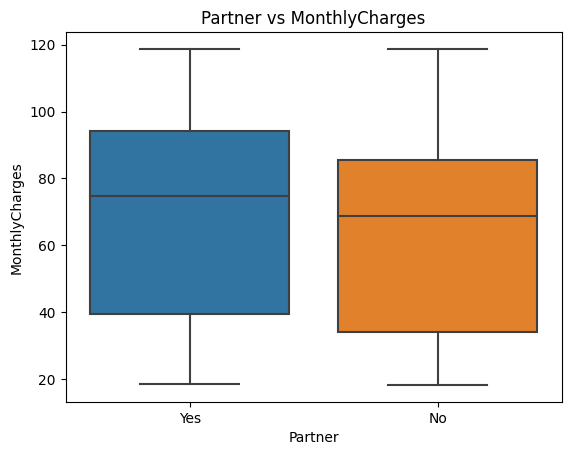

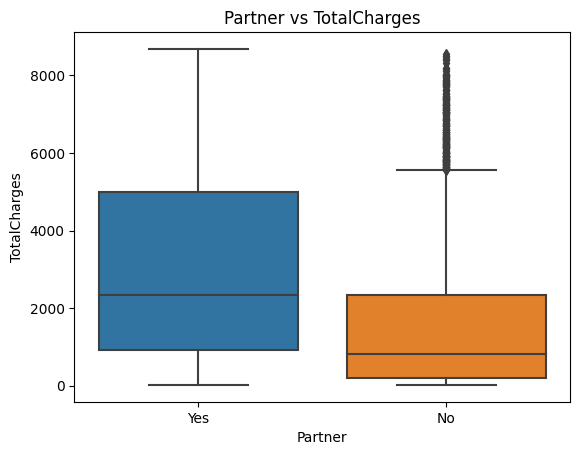

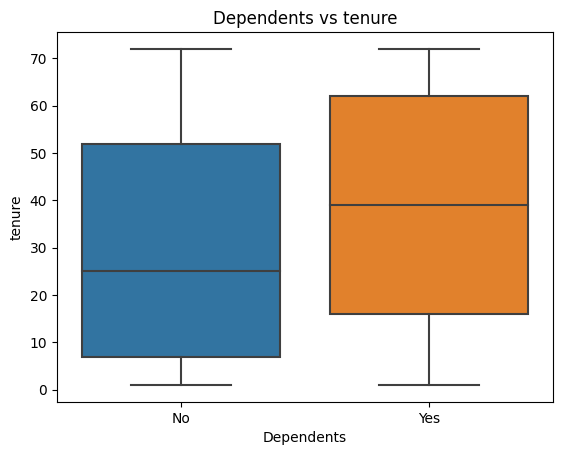

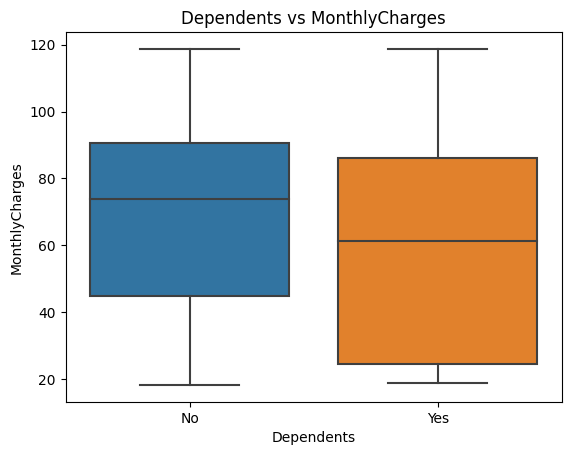

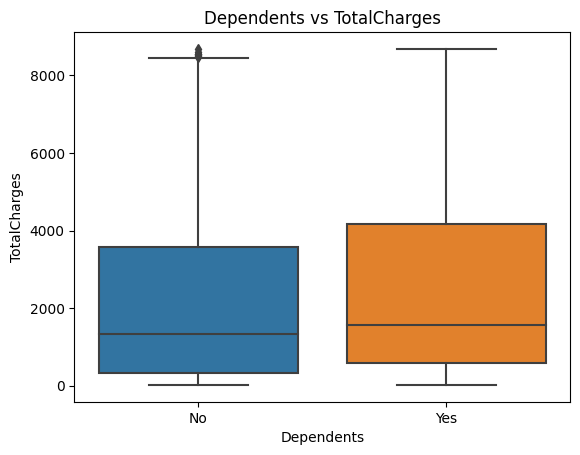

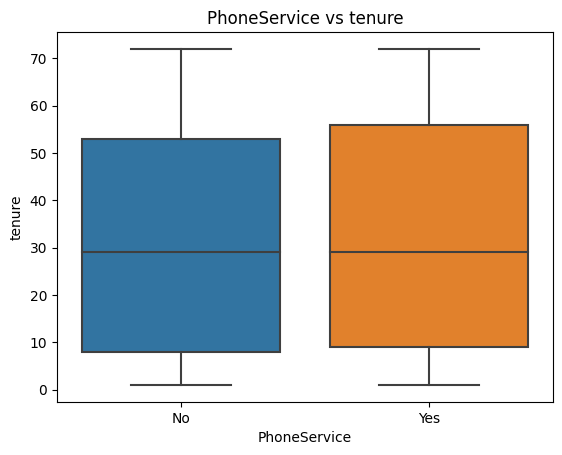

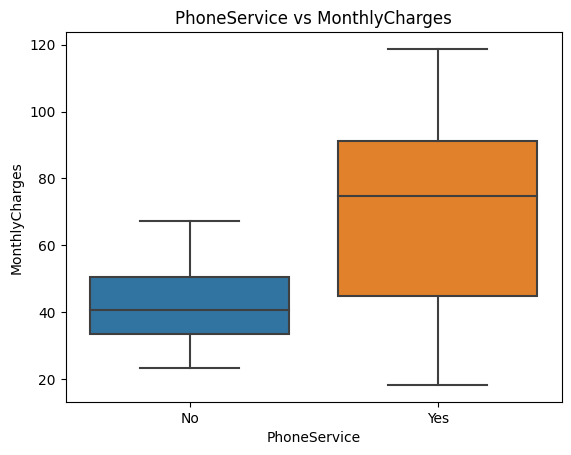

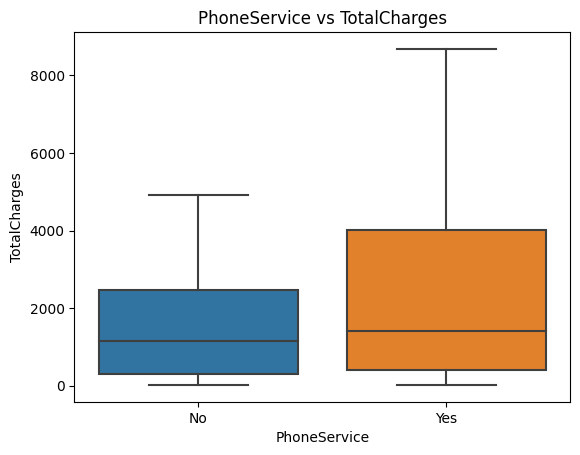

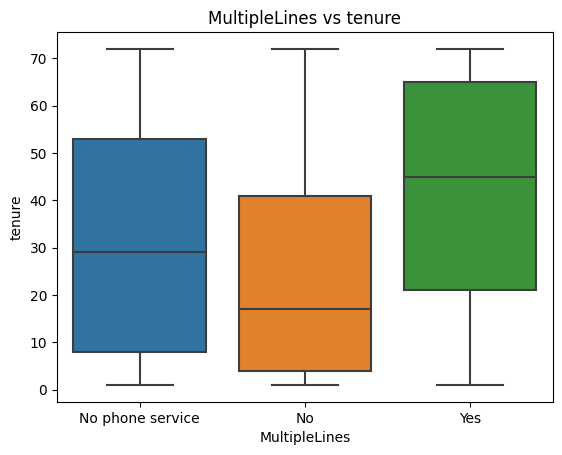

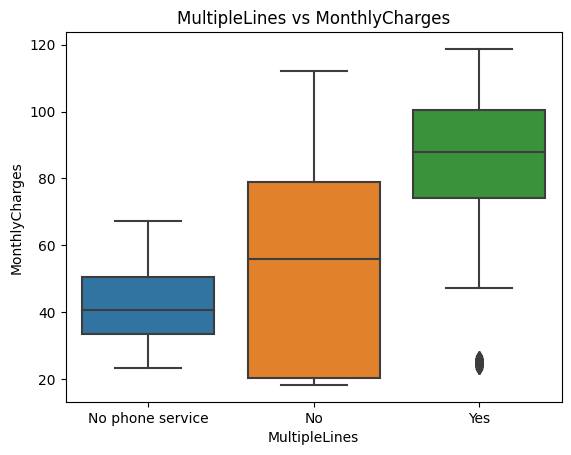

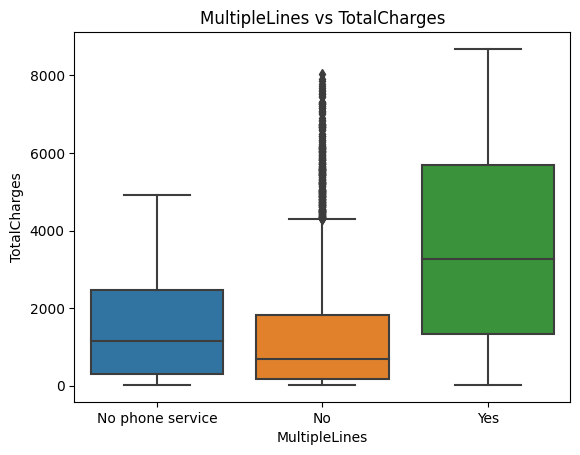

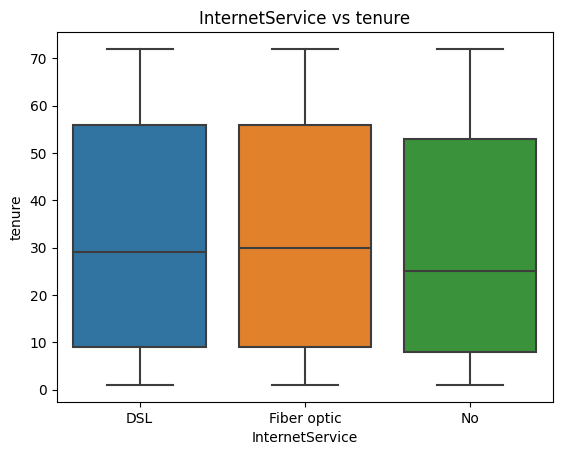

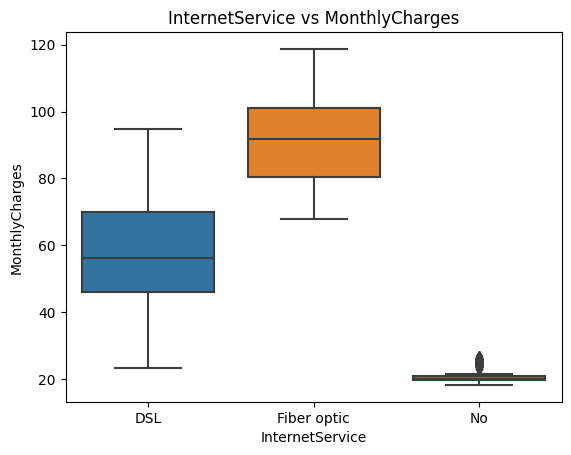

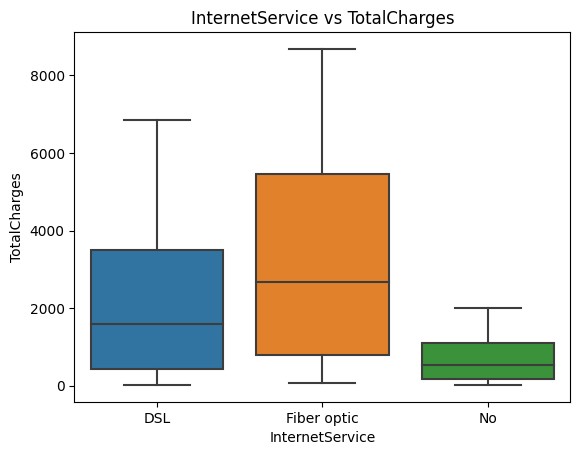

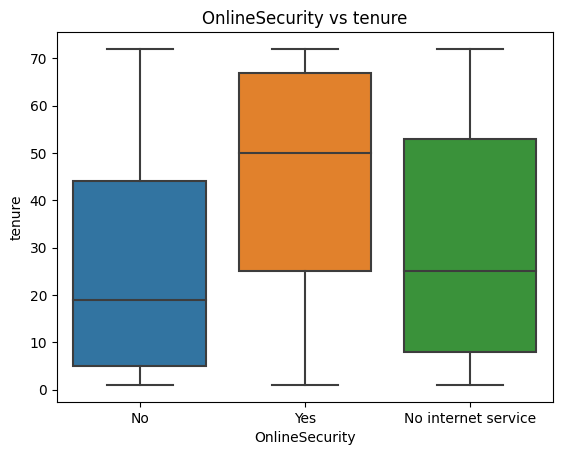

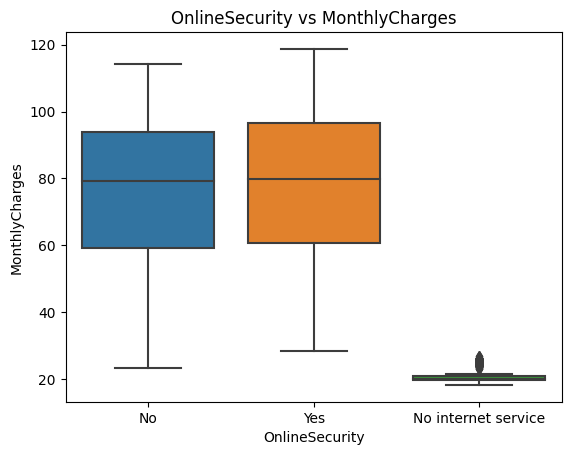

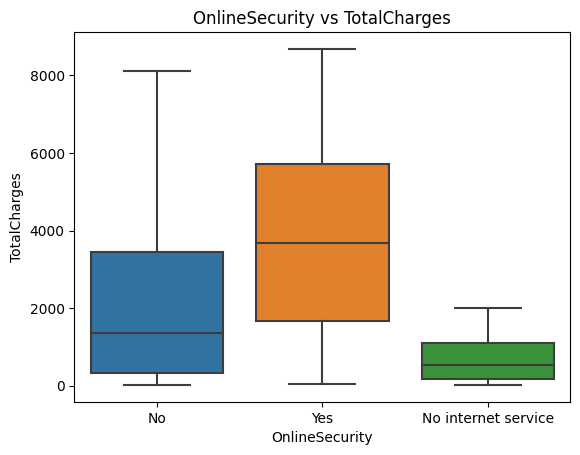

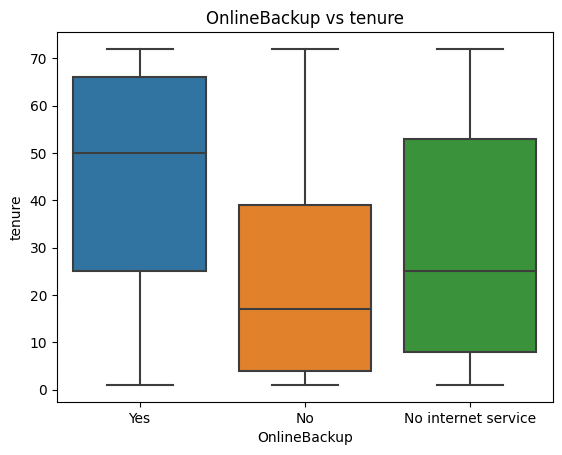

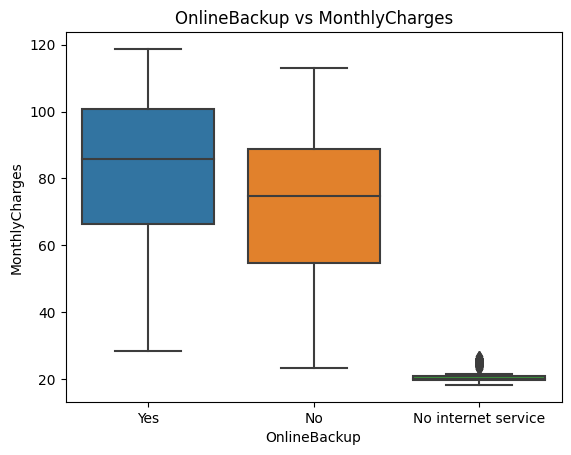

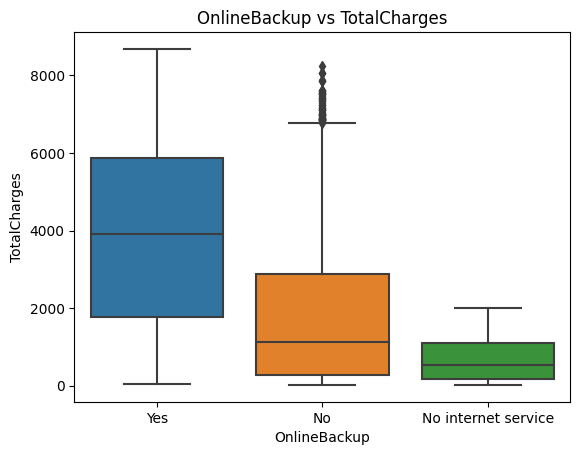

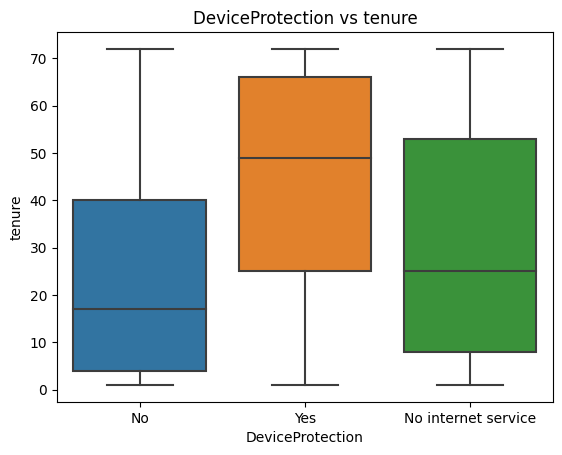

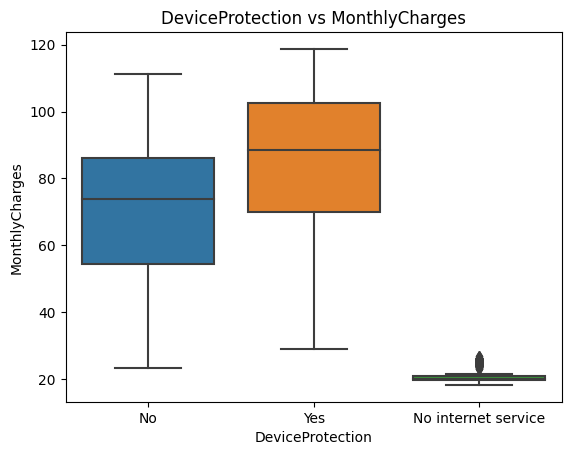

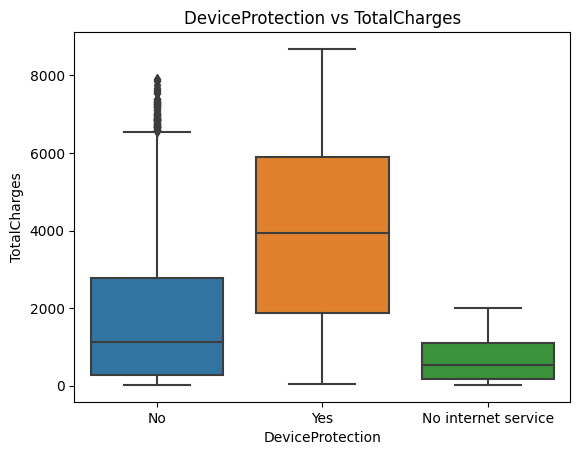

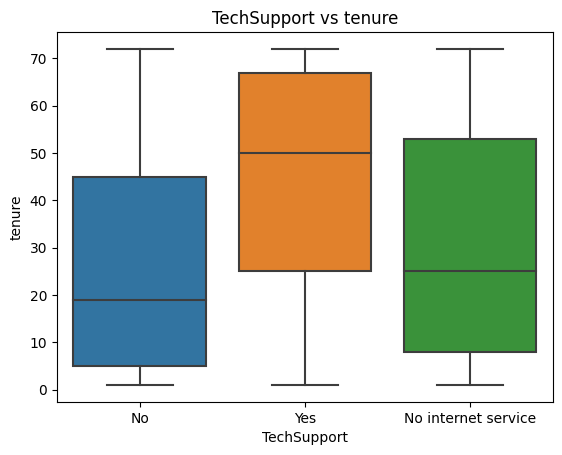

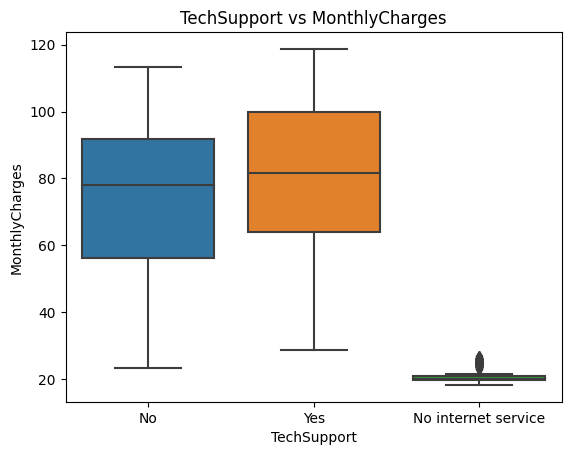

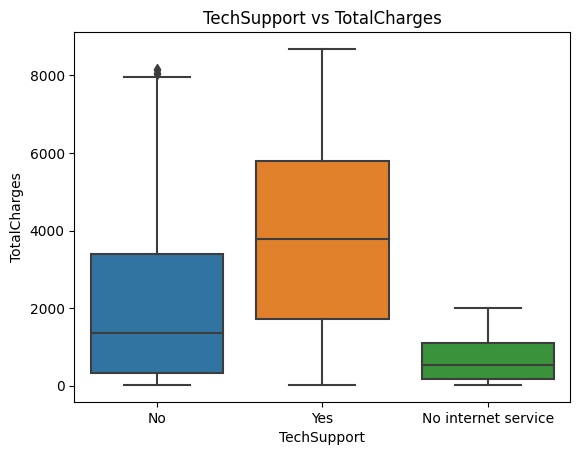

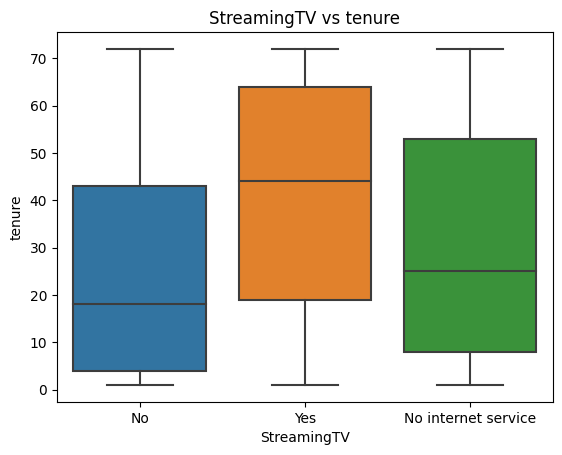

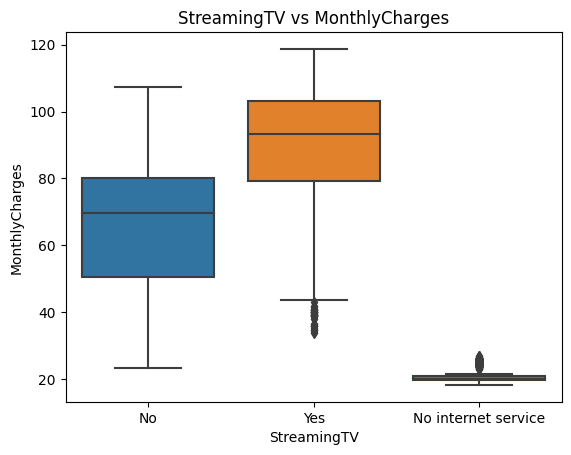

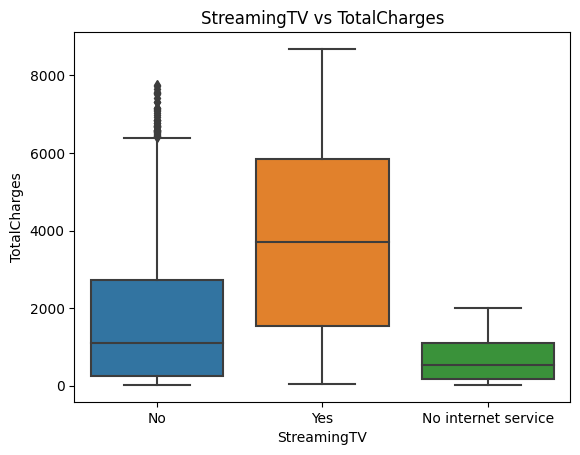

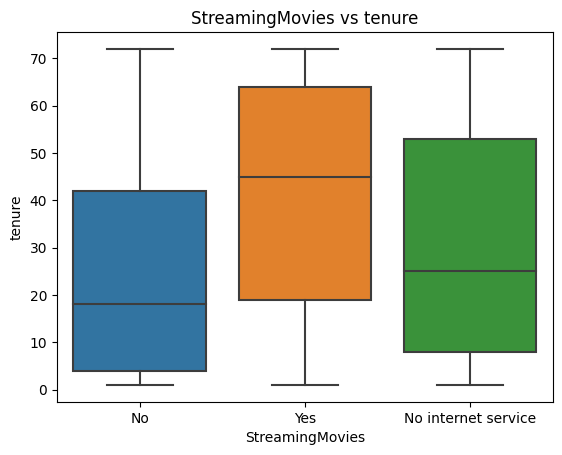

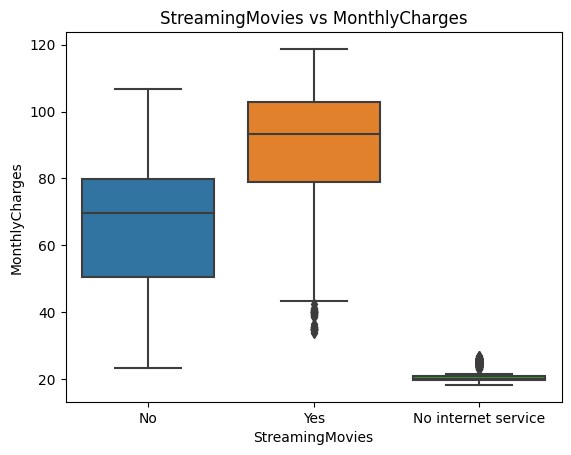

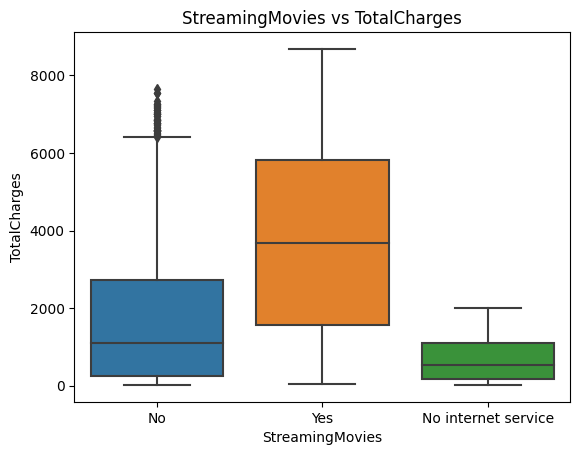

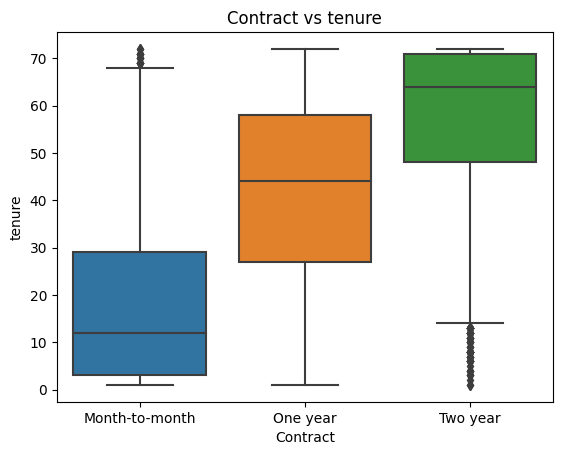

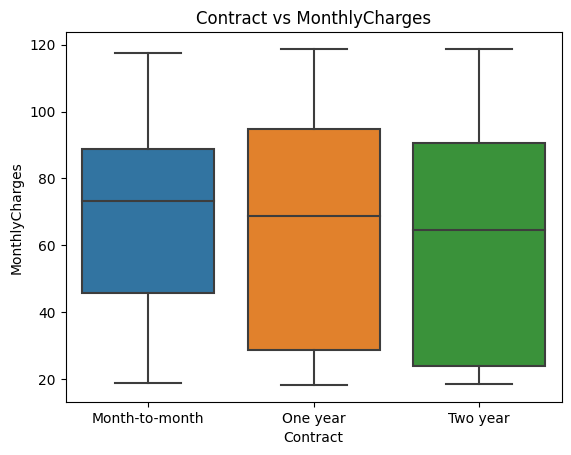

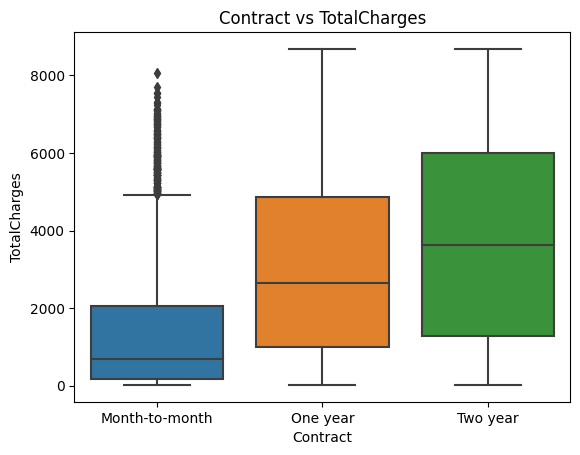

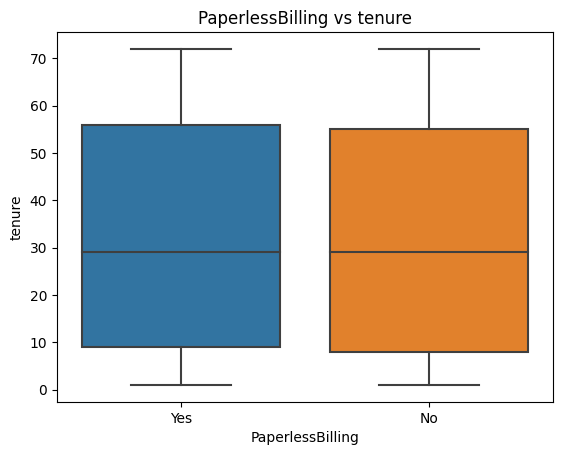

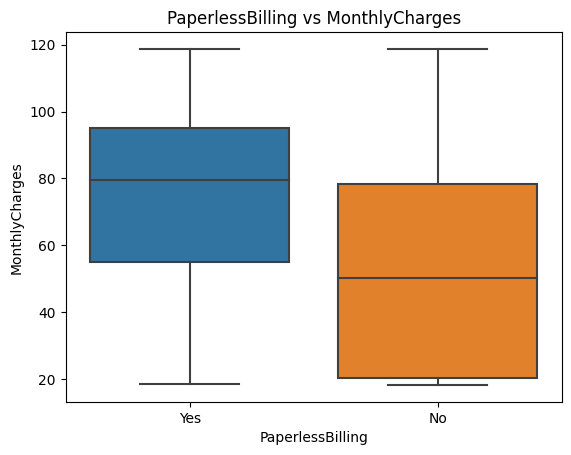

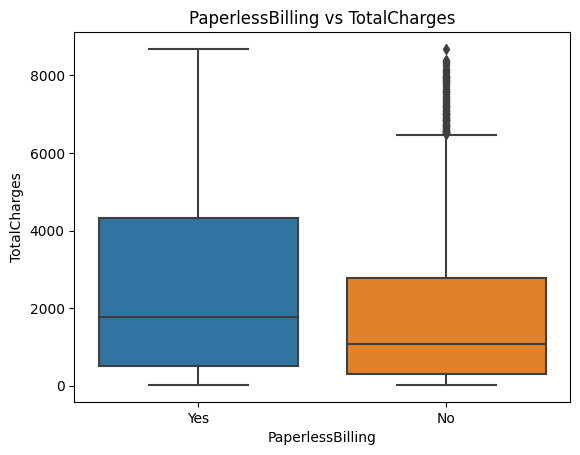

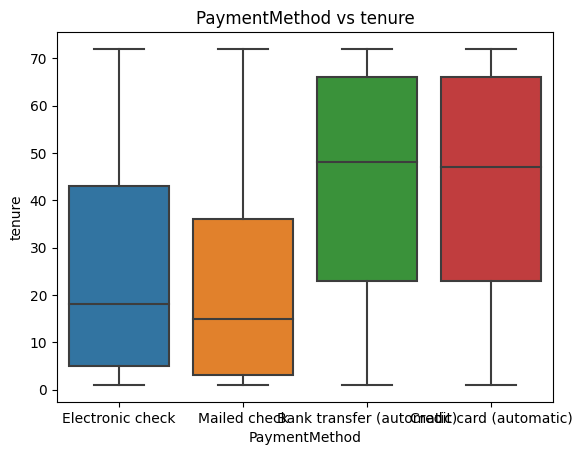

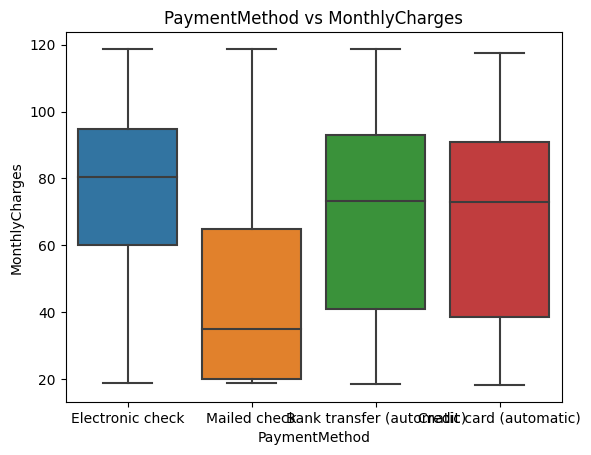

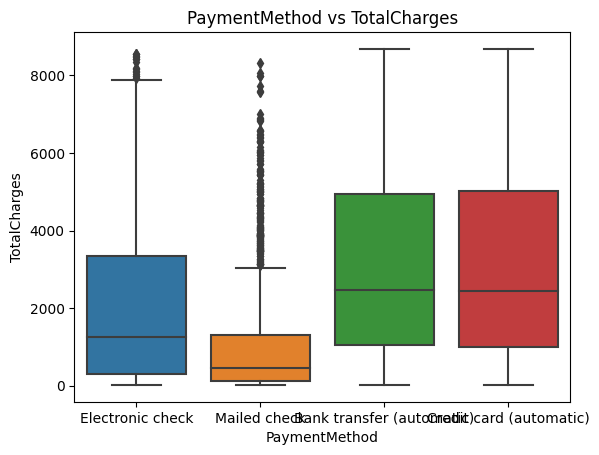

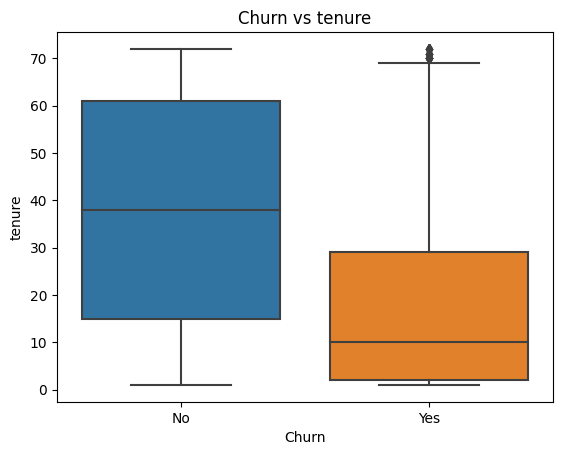

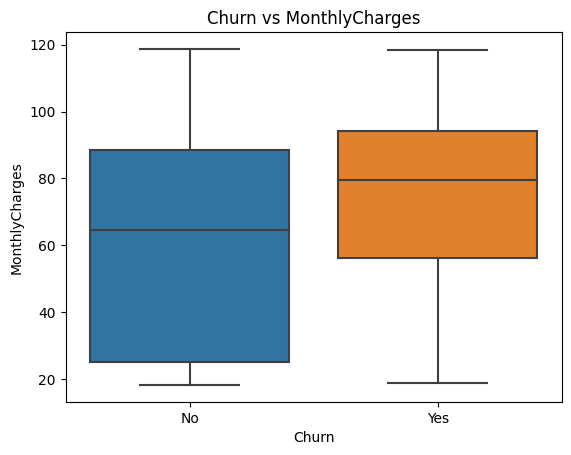

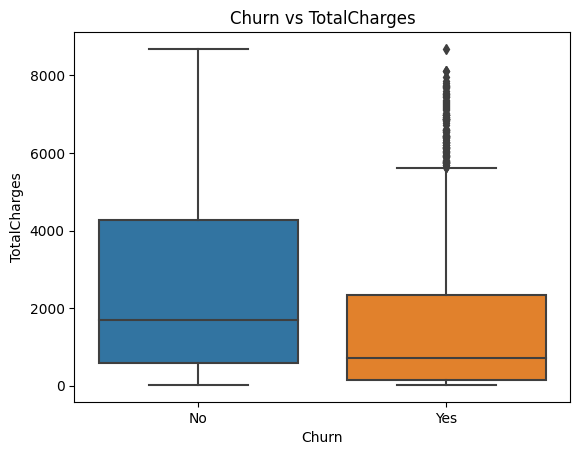

In [ ]:


numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']


categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for i in range(len(numerical_features)):
    for j in range(i+1, len(numerical_features)):
        plt.scatter(data[numerical_features[i]], data[numerical_features[j]])
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])
        plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')
        plt.show()

for cat_feature in categorical_features:
    for num_feature in numerical_features:
        sns.boxplot(x=cat_feature, y=num_feature, data=data)
        plt.title(f'{cat_feature} vs {num_feature}')
        plt.show()


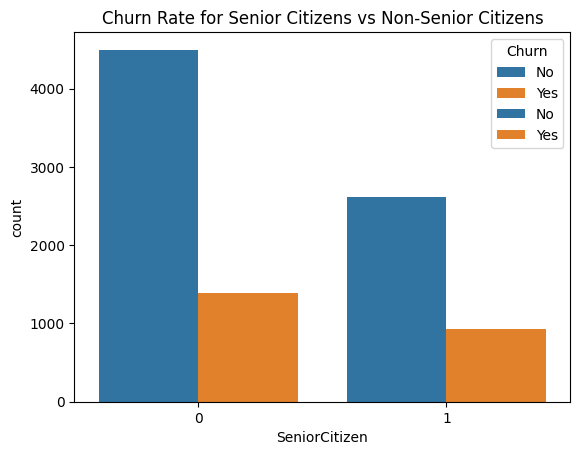

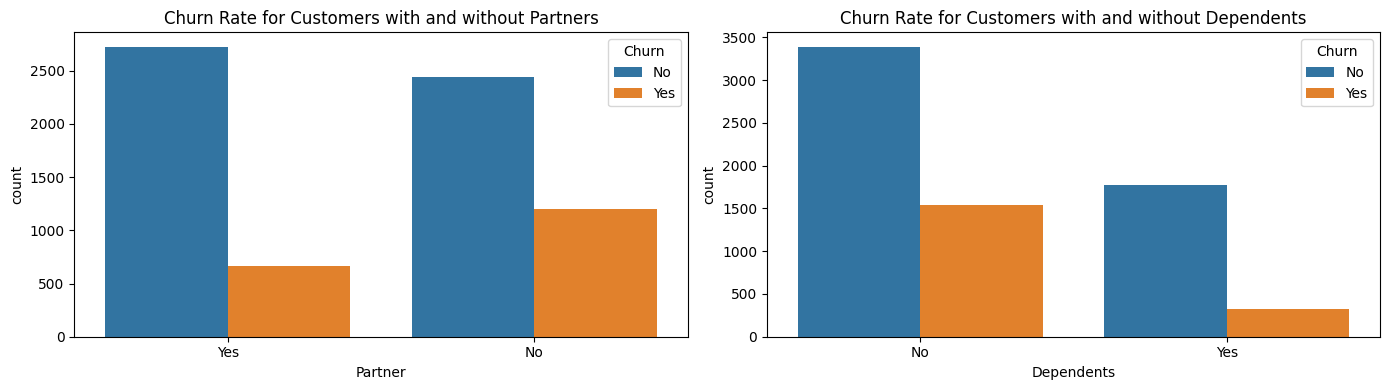

In [ ]:
sns.countplot(x='gender', hue='Churn', data=data)
plt.title('Churn Rate by Gender')


sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn Rate for Senior Citizens vs Non-Senior Citizens')

fig, ax = plt.subplots(1, 2, figsize=(14, 4))

sns.countplot(x='Partner', hue='Churn', data=data, ax=ax[0])
ax[0].set_title('Churn Rate for Customers with and without Partners')

sns.countplot(x='Dependents', hue='Churn', data=data, ax=ax[1])
ax[1].set_title('Churn Rate for Customers with and without Dependents')

plt.tight_layout()
plt.show()



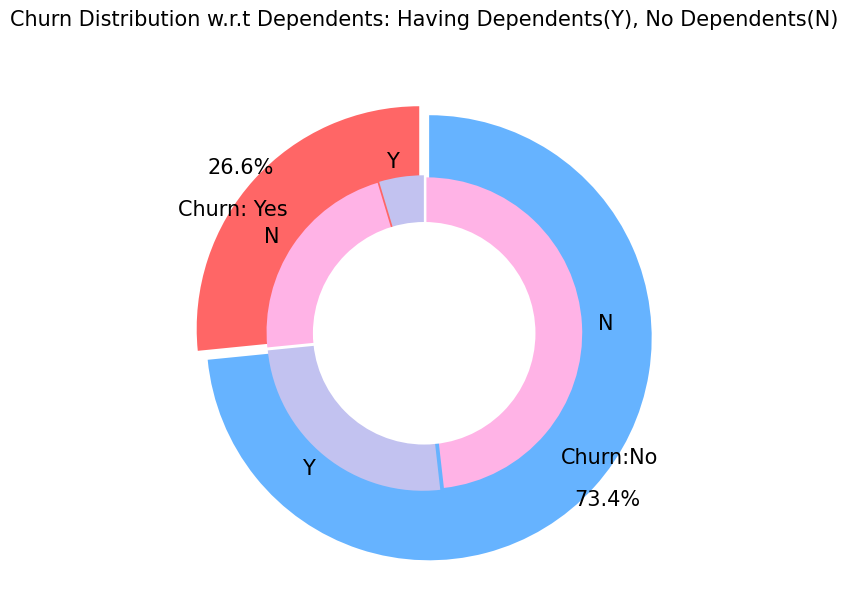

In [ ]:
def get_size_list(df, col):
  a = df["Churn"][df["Churn"]=="Yes"].groupby(by=df[col]).count()[1]
  b = df["Churn"][df["Churn"]=="Yes"].groupby(by=df[col]).count()[0]
  c = df["Churn"][df["Churn"]=="No"].groupby(by=df[col]).count()[1]
  d = df["Churn"][df["Churn"]=="No"].groupby(by=df[col]).count()[0]
  l = [a, b, c, d]
  return l

plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["Y","N","Y","N"]
sizes_gender = get_size_list(data, 'Dependents')
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Dependents: Having Dependents(Y), No Dependents(N)', fontsize=15, y=1.1)




plt.axis('equal')
plt.tight_layout()
plt.show()

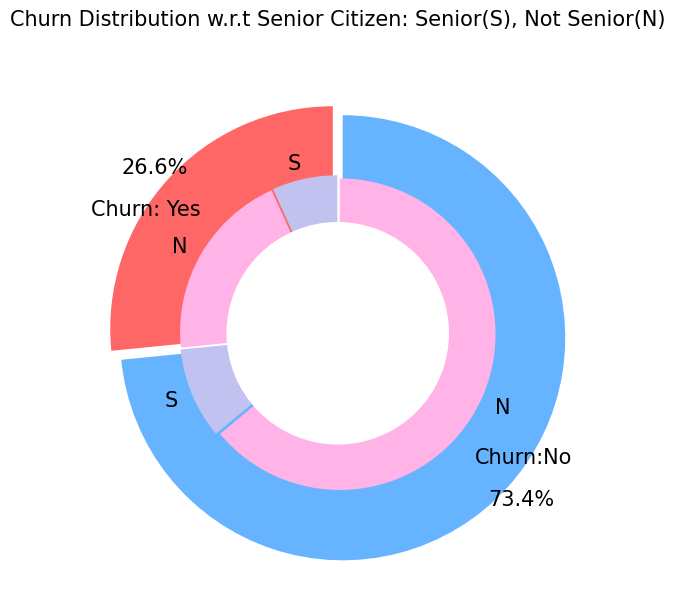

In [ ]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["S","N","S","N"]
sizes_gender = [476,1393,666,4497]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Senior Citizen: Senior(S), Not Senior(N)', fontsize=15, y=1.1)

plt.axis('equal')
plt.tight_layout()
plt.show()



1.   Churn rate of non senior citizens is higher than senior citizens
2.   Churn rate of single customers is higher than non single customers
3.   Churn rate of customers with dependents is much lower than customers with dependents



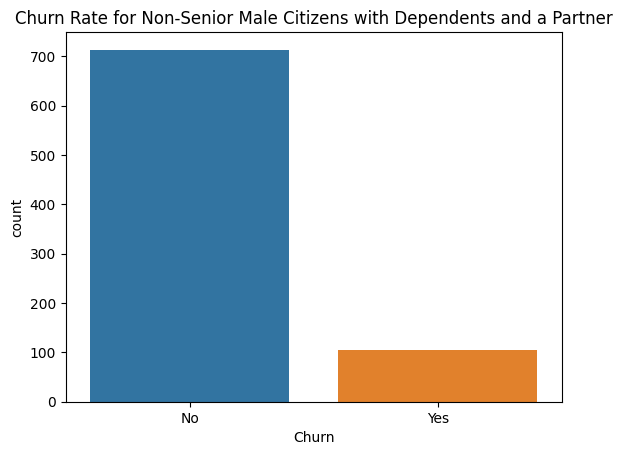

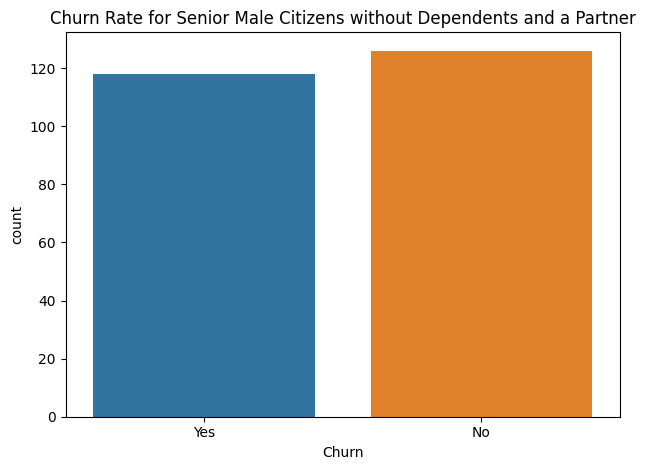

In [ ]:
# Create a subset of the data for non-senior male citizens with dependents and a partner
subset1 = data[(data['SeniorCitizen'] == 0) & (data['gender'] == 'Male') & (data['Dependents'] == 'Yes') & (data['Partner'] == 'Yes')]
plt.figure()
# Create a bar plot of the churn rate for this subset
sns.countplot(x='Churn', data=subset1)
plt.title('Churn Rate for Non-Senior Male Citizens with Dependents and a Partner')

# Create a subset of the data for senior male citizens without dependents and a partner
subset2 = data[(data['SeniorCitizen'] == 1) & (data['gender'] == 'Male') & (data['Dependents'] == 'No') & (data['Partner'] == 'No')]
plt.figure()
# Create a bar plot of the churn rate for this subset
sns.countplot(x='Churn', data=subset2)
plt.title('Churn Rate for Senior Male Citizens without Dependents and a Partner')



# Display the plots
plt.tight_layout()
plt.show()


Churn is much lower for non senior citizens with dependents and partners than senior citizens with not dependents and partners


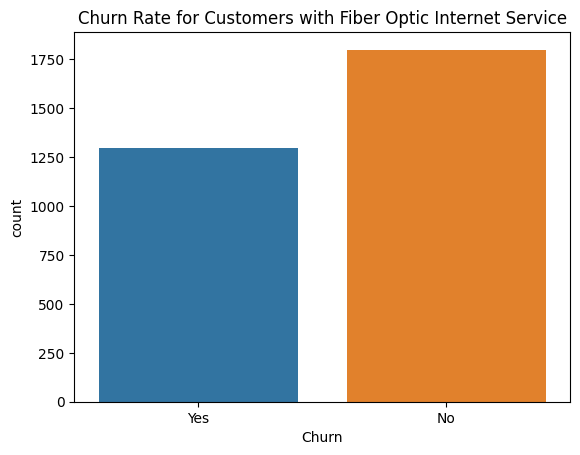

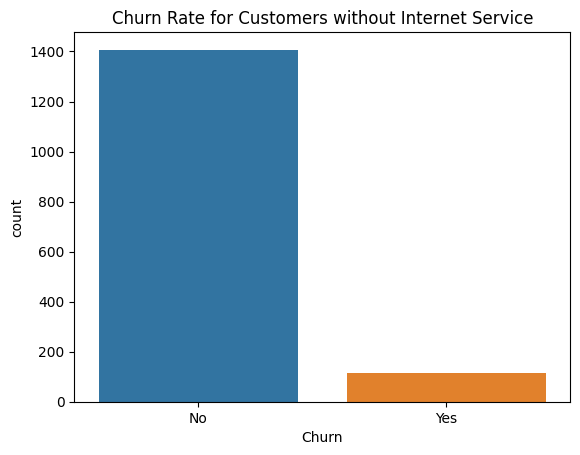

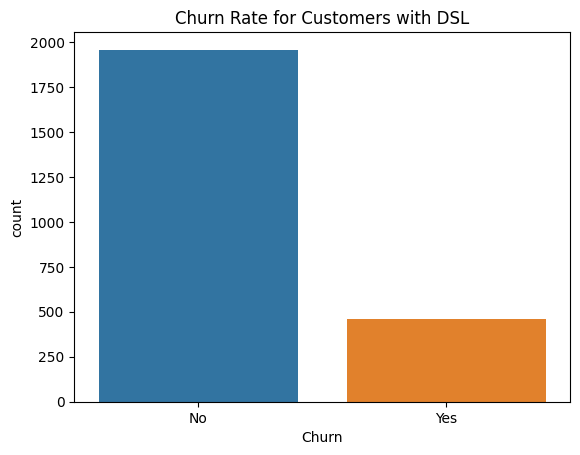

<Figure size 640x480 with 0 Axes>

In [ ]:

# Customers with fiber optic internet service
subset4 = data[data['InternetService'] == 'Fiber optic']
sns.countplot(x='Churn', data=subset4)
plt.title('Churn Rate for Customers with Fiber Optic Internet Service')
plt.figure()


# Customers without internet service
subset5 = data[data['InternetService'] == 'No']
sns.countplot(x='Churn', data=subset5)
plt.title('Churn Rate for Customers without Internet Service')
plt.figure()

# Customers with DSL
subset5 = data[data['InternetService'] == 'DSL']
sns.countplot(x='Churn', data=subset5)
plt.title('Churn Rate for Customers with DSL')
plt.figure()

# Display the plots
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Tenure Distribution on Customer Churn')

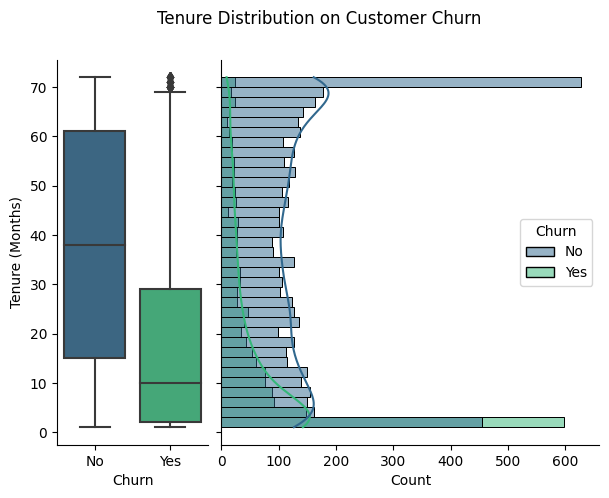

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots are displayed inline
%matplotlib inline

# Create a subplot with two columns and shared y-axis
fig, ax = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(7, 5),
    gridspec_kw={
        'width_ratios': [2, 5],
        'wspace': 0.05
    }
)

# Create a boxplot for 'tenure' vs. 'Churn'
sns.boxplot(
    data=data,
    y='tenure',
    x='Churn',
    ax=ax[0],
    palette='viridis'
).set_ylabel('Tenure (Months)')

# Create a histogram and KDE plot for 'tenure' with hue 'Churn'
sns.histplot(
    data=data,
    y='tenure',
    hue='Churn',
    ax=ax[1],
    bins=35,
    palette='viridis',
    kde=True
)

# Remove the spines (top and right lines) from the plot
sns.despine()

# Add a title to the figure
fig.suptitle('Tenure Distribution on Customer Churn')

#https://www.kaggle.com/code/reyhanarighy/predictive-ml-for-telco-customer-churn?scriptVersionId=144901561&cellId=17

Customers with less tenure seem more likely to churn. There are outliers with churn customers though. A number of them with high tenures churn. It appears customers with dependents are more likely to stay that customers without dependent.


# Encoding and Feature Extraction

In [ ]:
data.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [ ]:
cat_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

In [ ]:
encoded_df = pd.get_dummies(data, columns=cat_cols)

In [ ]:
encoded_df

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,34,56.95,1889.50,No,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,2,53.85,108.15,Yes,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,45,42.30,1840.75,No,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,Yes,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,24,84.80,1990.50,No,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,0,72,103.20,7362.90,No,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,0,11,29.60,346.45,No,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,8361-LTMKD,1,4,74.40,306.60,Yes,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
y = encoded_df['Churn']

In [ ]:
encoded_df.drop('customerID', axis=1, inplace=True)
encoded_df.drop('Churn', axis=1, inplace=True)

In [ ]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
scaler = StandardScaler()

In [ ]:
X = pd.DataFrame(scaler.fit_transform(encoded_df), columns=encoded_df.columns)

In [ ]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.440327,-1.280248,-1.161694,-0.994194,1.009430,-1.009430,-1.035617,1.035617,0.652305,-0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
1,-0.440327,0.064303,-0.260878,-0.173740,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,-0.529976,-0.525351,-0.711863,1.839576
2,-0.440327,-1.239504,-0.363923,-0.959649,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576
3,-0.440327,0.512486,-0.747850,-0.195248,-0.990658,0.990658,0.965608,-0.965608,0.652305,-0.652305,...,-0.796849,-1.107895,1.943495,-0.561364,1.206361,-1.206361,1.886879,-0.525351,-0.711863,-0.543604
4,-0.440327,-1.239504,0.196178,-0.940457,1.009430,-1.009430,0.965608,-0.965608,0.652305,-0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180,-0.990658,0.990658,-1.035617,1.035617,-1.533025,1.533025,...,1.254943,-1.107895,1.943495,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576
7028,-0.440327,1.612573,1.276493,2.241056,1.009430,-1.009430,-1.035617,1.035617,-1.533025,1.533025,...,1.254943,-1.107895,1.943495,-0.561364,-0.828939,0.828939,-0.529976,1.903490,-0.711863,-0.543604
7029,-0.440327,-0.872808,-1.170004,-0.854514,1.009430,-1.009430,-1.035617,1.035617,-1.533025,1.533025,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,1.404764,-0.543604
7030,2.271039,-1.158016,0.319168,-0.872095,-0.990658,0.990658,-1.035617,1.035617,0.652305,-0.652305,...,-0.796849,0.902613,-0.514537,-0.561364,-0.828939,0.828939,-0.529976,-0.525351,-0.711863,1.839576


In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
feature_model = RandomForestRegressor()

In [ ]:
feature_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
feature_importance = feature_model.feature_importances_

In [ ]:
feature_importance_df_train = pd.DataFrame({'Feature': encoded_df.columns, 'Importance': feature_importance})

In [ ]:
feature_importance_df_train = feature_importance_df_train.sort_values(by='Importance', ascending=False)

In [ ]:
feature_importance_df_train

,Feature,Importance
2,MonthlyCharges,0.188793
3,TotalCharges,0.185512
36,Contract_Month-to-month,0.170316
1,tenure,0.117095
16,InternetService_Fiber optic,0.049686
43,PaymentMethod_Electronic check,0.018539
0,SeniorCitizen,0.018427
18,OnlineSecurity_No,0.015414
4,gender_Female,0.013464
5,gender_Male,0.012632


In [ ]:
top_features = feature_importance_df_train.head(5)["Feature"].tolist()

From EDA, Senior Citizenship, Dependence and whether or not the Customer had a partner appeared to play a role in the churn. Therefore, they will be included in top features

In [ ]:

top_features.extend(['SeniorCitizen', 'Dependents_Yes', 'Partner_Yes'])
top_features

['MonthlyCharges',
 'TotalCharges',
 'Contract_Month-to-month',
 'tenure',
 'InternetService_Fiber optic',
 'SeniorCitizen',
 'Dependents_Yes',
 'Partner_Yes']

In [ ]:
X_train = X_train[top_features]
X_test = X_test[top_features]
X_val = X_val[top_features]

In [ ]:
X_train

,MonthlyCharges,TotalCharges,Contract_Month-to-month,tenure,InternetService_Fiber optic,SeniorCitizen,Dependents_Yes,Partner_Yes
6021,-0.523477,-0.091370,0.902613,0.430998,-0.886896,-0.440327,-0.652305,-0.965608
3404,-0.378881,-0.924111,0.902613,-1.198760,-0.886896,-0.440327,-0.652305,-0.965608
5474,0.430523,0.959516,0.902613,0.919926,1.127527,-0.440327,-0.652305,1.035617
5515,-0.337331,0.119297,-1.107895,0.512486,-0.886896,-0.440327,1.533025,1.035617
6328,1.200040,1.396490,-1.107895,0.919926,1.127527,-0.440327,1.533025,1.035617
...,...,...,...,...,...,...,...,...
3772,-0.478603,-0.946811,0.902613,-1.198760,-0.886896,-0.440327,-0.652305,-0.965608
5191,1.552388,1.508839,-1.107895,0.756950,1.127527,-0.440327,-0.652305,-0.965608
5226,0.543541,-0.661274,0.902613,-0.954296,1.127527,-0.440327,-0.652305,-0.965608
5390,-1.497422,-0.571007,-1.107895,0.716206,-0.886896,-0.440327,-0.652305,-0.965608


In [ ]:
# Define the input layer
#inputs = Input(shape=(X_train.shape[1],))

# Define the hidden layers
#x = Dense(64, activation='relu')(inputs)
#x = Dense(64, activation='relu')(x)

# Define the output layer
#outputs = Dense(1, activation='sigmoid')(x)

# Create the model
#model_1 = Model(inputs=inputs, outputs=outputs)

def create_model(dropout_rate=0.0):
    # Define the input layer
    inputs = Input(shape=(X_train.shape[1],))

    # Define the hidden layers
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)  # Add dropout layer after the first hidden layer
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)  # Add dropout layer after the second hidden layer

    # Define the output layer
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
model_1 = create_model(dropout_rate=0.5)

Epoch 1/10
176/176 [==============================] - 2s 4ms/step - loss: 0.5125 - accuracy: 0.7467 - val_loss: 0.4258 - val_accuracy: 0.7937
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.7739 - val_loss: 0.4259 - val_accuracy: 0.7966
Epoch 3/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.7831 - val_loss: 0.4228 - val_accuracy: 0.7937
Epoch 4/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4520 - accuracy: 0.7822 - val_loss: 0.4246 - val_accuracy: 0.8051
Epoch 5/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4485 - accuracy: 0.7815 - val_loss: 0.4223 - val_accuracy: 0.8009
Epoch 6/10
176/176 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7924 - val_loss: 0.4218 - val_accuracy: 0.7980
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7852 - val_loss: 0.4208 - val_accuracy: 0.8065
Epoch 

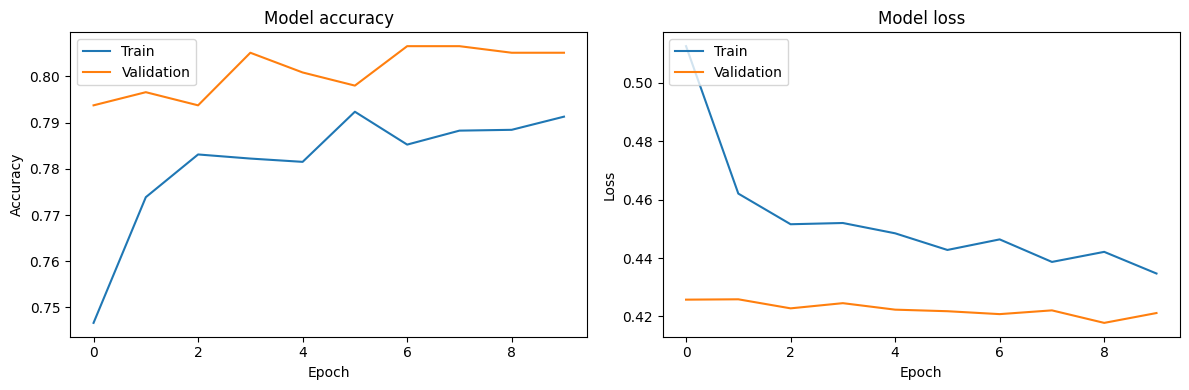

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and save the history
history = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


22/22 [==============================] - 0s 2ms/step - loss: 0.4795 - accuracy: 0.7741
Test Loss: 0.4795423448085785
Test Accuracy: 0.7741477489471436


In [ ]:
def create_model(dropout_rate=0.0):
    # Define the input layer
    inputs = Input(shape=(X_train.shape[1],))

    # Define the hidden layers
    x = Dense(64, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)  # Add dropout layer after the first hidden layer
    x = Dense(64, activation='relu')(x)
    x = Dropout(dropout_rate)(x)  # Add dropout layer after the second hidden layer

    # Define the output layer
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



model = KerasClassifier(build_fn=create_model, dropout_rate=0.0, verbose=1)


param_grid = {'batch_size': [10, 20, 30, 40],
              'epochs': [10, 50, 70, 100],
              'dropout_rate' : [0.5, 0.6, 0.7, 0.8]}


grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/70


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


141/141 [==============================] - 1s 2ms/step - loss: 0.4965 - accuracy: 0.7559
Epoch 2/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4556 - accuracy: 0.7803
Epoch 3/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7792
Epoch 4/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.7842
Epoch 5/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7808
Epoch 6/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7874
Epoch 7/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7899
Epoch 8/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7881
Epoch 9/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7868
Epoch 10/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7900
Epoch 11/7

Epoch 1/70
141/141 [==============================] - 4s 9ms/step - loss: 0.5212 - accuracy: 0.7344 - val_loss: 0.4318 - val_accuracy: 0.7909
Epoch 2/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.7781 - val_loss: 0.4288 - val_accuracy: 0.7980
Epoch 3/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.7767 - val_loss: 0.4268 - val_accuracy: 0.7966
Epoch 4/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.7851 - val_loss: 0.4252 - val_accuracy: 0.7952
Epoch 5/70
141/141 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.7788 - val_loss: 0.4267 - val_accuracy: 0.7980
Epoch 6/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4449 - accuracy: 0.7870 - val_loss: 0.4234 - val_accuracy: 0.7937
Epoch 7/70
141/141 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.7879 - val_loss: 0.4223 - val_accuracy: 0.8023
Epoch 

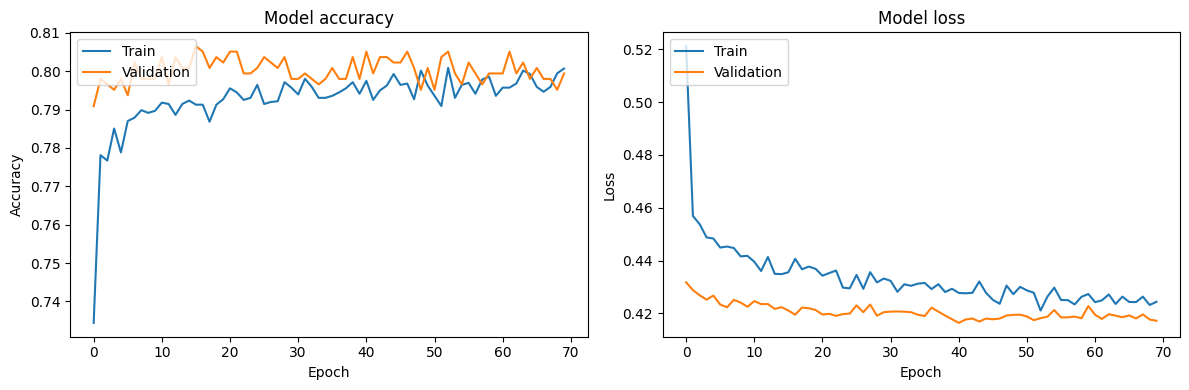

In [ ]:
import matplotlib.pyplot as plt

# Fit the model and save the history
model_1 = create_model(dropout_rate=0.5)
history = model_1.fit(X_train, y_train, epochs=70, batch_size=40, validation_data=(X_val, y_val))

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

22/22 [==============================] - 0s 2ms/step - loss: 0.4712 - accuracy: 0.7784
Test Loss: 0.47115468978881836
Test Accuracy: 0.7784090638160706


In [ ]:
# Use the model to predict the probabilities of the positive class
y_pred_proba = model_1.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

# Print the AUC score
print(auc)

22/22 [==============================] - 0s 1ms/step
0.8045325638091448


In [ ]:
X_train

,MonthlyCharges,TotalCharges,Contract_Month-to-month,tenure,InternetService_Fiber optic,SeniorCitizen,Dependents_Yes,Partner_Yes
6021,-0.523477,-0.091370,0.902613,0.430998,-0.886896,-0.440327,-0.652305,-0.965608
3404,-0.378881,-0.924111,0.902613,-1.198760,-0.886896,-0.440327,-0.652305,-0.965608
5474,0.430523,0.959516,0.902613,0.919926,1.127527,-0.440327,-0.652305,1.035617
5515,-0.337331,0.119297,-1.107895,0.512486,-0.886896,-0.440327,1.533025,1.035617
6328,1.200040,1.396490,-1.107895,0.919926,1.127527,-0.440327,1.533025,1.035617
...,...,...,...,...,...,...,...,...
3772,-0.478603,-0.946811,0.902613,-1.198760,-0.886896,-0.440327,-0.652305,-0.965608
5191,1.552388,1.508839,-1.107895,0.756950,1.127527,-0.440327,-0.652305,-0.965608
5226,0.543541,-0.661274,0.902613,-0.954296,1.127527,-0.440327,-0.652305,-0.965608
5390,-1.497422,-0.571007,-1.107895,0.716206,-0.886896,-0.440327,-0.652305,-0.965608


In [ ]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [ ]:
df_transform = encoded_df[top_features]
df_scaled = X = pd.DataFrame(scaler.fit_transform(df_transform), columns=df_transform.columns)
df_scaled

,MonthlyCharges,TotalCharges,Contract_Month-to-month,tenure,InternetService_Fiber optic,SeniorCitizen,Dependents_Yes,Partner_Yes
0,-1.161694,-0.994194,0.902613,-1.280248,-0.886896,-0.440327,-0.652305,1.035617
1,-0.260878,-0.173740,-1.107895,0.064303,-0.886896,-0.440327,-0.652305,-0.965608
2,-0.363923,-0.959649,0.902613,-1.239504,-0.886896,-0.440327,-0.652305,-0.965608
3,-0.747850,-0.195248,-1.107895,0.512486,-0.886896,-0.440327,-0.652305,-0.965608
4,0.196178,-0.940457,0.902613,-1.239504,1.127527,-0.440327,-0.652305,-0.965608
...,...,...,...,...,...,...,...,...
7027,0.664868,-0.129180,-1.107895,-0.343137,-0.886896,-0.440327,1.533025,1.035617
7028,1.276493,2.241056,-1.107895,1.612573,1.127527,-0.440327,1.533025,1.035617
7029,-1.170004,-0.854514,0.902613,-0.872808,-0.886896,-0.440327,1.533025,1.035617
7030,0.319168,-0.872095,0.902613,-1.158016,1.127527,2.271039,-0.652305,1.035617


In [ ]:
import pickle

#Let's assume `model` is your trained model
model = model_1

# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)
scaler_dump = pickle.dumps(scaler)
features_dump = pickle.dumps(top_features)
# Save the pickled model to a file
with open('model.pkl', 'wb') as file:
    file.write(saved_model)

with open('scaler.pkl', 'wb') as file:
    file.write(scaler_dump)

with open('features.pkl', 'wb') as file:
    file.write(features_dump)


from google.colab import files

# Download the file to your computer
files.download('model.pkl')
files.download('scaler.pkl')
files.download('features.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>